In [1]:
import natsort as natsort
import pandas as pd
import os
import natsort
from datetime import date, datetime
import matplotlib.pyplot as plt
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']= False
from IPython.core.display_functions import display

# Schedule.ipynb를 작성하고 나서
### 의외로 득실차는 LG가 더 좋았다.

In [6]:
team_list = ["LG", "SSG"]
color_list=["#DB1916", "#fff000"]

init_data = [0,0,0,0,0,0]
KBO_team = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배", "득점", "실점"], index=team_list)
for team in team_list:
    KBO_team.loc[team] = init_data

KBO_team

,경기수,승리,무승부,패배,득점,실점
LG,0,0,0,0,0,0
SSG,0,0,0,0,0,0


In [4]:
rank_list = os.listdir("./date_rank")
sorted_rank = natsort.natsorted(rank_list)

In [16]:
df_list = []
for team, color in zip(team_list, color_list):
    df_result = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배","득점","실점","승점", "게임차", "순위", "일자", "득실차"])

    for file in sorted_rank:
        if file == ".DS_Store":
            continue
        date = datetime.strptime("2022."+file.replace('.csv', ''), '%Y.%m.%d')
        rank_df = pd.read_csv('./date_rank/'+file, index_col=0)
        rank_df["일자"] = date
        rank_df["득실차"] = rank_df["득점"] - rank_df["실점"]

        rank_list = list(rank_df.loc[team, :])
        df_result.loc[len(df_result)] = rank_list
    df_list.append(df_result)

<Figure size 3000x500 with 0 Axes>

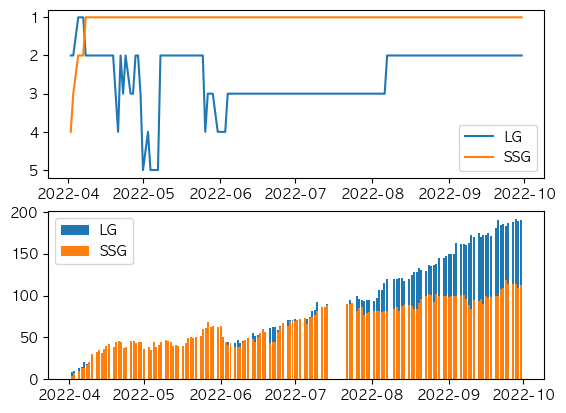

<Figure size 3000x500 with 0 Axes>

In [28]:
nrow = 2
ncol = 1

plt.subplot(2,1,1)
plt.plot(df_list[0]["일자"], df_list[0]["순위"], label=team_list[0])
plt.plot(df_list[1]["일자"], df_list[1]["순위"], label=team_list[1])
plt.gca().invert_yaxis()
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.bar(df_list[0]["일자"], df_list[0]["득실차"], label=team_list[0])
plt.bar(df_list[1]["일자"], df_list[1]["득실차"], label=team_list[1])
plt.legend(loc='best')

plt.figure(figsize=(30,5))

- 전반기에는 SSG가 더 적게 실점하고 더 많이 득점을 얻어내는 경향을 보였음
- 하지만 올스타전 이후 LG가 더 적게 실점함녀서 더 많은 득점을 얻어내는 경향을 보이기 시작함.